In [51]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install sktime matplotlib seaborn

     |████████████████████████████████| 292 kB 6.3 MB/s eta 0:00:01


In [25]:
import os
import glob

DATA_PATH = os.path.expanduser('~/code/sandbox/python/wgta_conversion/combined')

for filename in sorted(glob.glob(f'{DATA_PATH}/**/*.csv', recursive=True)):


In [50]:
import pandas as pd

data = pd.read_pickle('~/code/sandbox/python/wgta_conversion/combined/ARC06/ARC06.ts')
data.head()

,UNIX,TIME,MET_SUBSECS,ED01_PRESS,ED02_PRESS,ED03_PRESS,EGC_PRESS,N2_CTRL_VALVE_FEED_PRESS,N2_PROP_TANKS_FEED_PRESS,N2_TANKS_PRESS,...,SC_POS_0,SC_POS_1,SC_POS_2,SC_VEL_0,SC_VEL_1,SC_VEL_2,SC_ACC_0,SC_ACC_1,SC_ACC_2,SC_ALT
0,0 0 1.351191e+09 1 1....,0 0 2012-10...,0 0 15335 1 16580 2 1789...,0 0 799 1 800 2 810 3 ...,0 0 806 1 799 2 802 3 ...,0 0 802 1 799 2 799 3 ...,0 0 794 1 797 2 801 3 ...,0 0 899 1 898 2 901 3 ...,0 0 1294 1 1300 2 1294 3 ...,0 0 2599 1 2597 2 2598 3 ...,...,0 0 1.043770e+06 1 1....,0 0 -1.001140e+06 1 -1....,0 0 251349.94301 1 25...,0 0 1787.51539 1 1787.5...,0 0 -237.55604 1 -237.5651...,0 0 93.55902 1 93.56063 2...,0 0 2.65739 1 2.69550 2 ...,0 0 -0.39270 1 -0.45697 2 ...,0 0 0.10550 1 0.08092 2 ...,0 0 1.043770e+06 1 1....


/home/elisertech/.python_env/jupyter/lib/python3.8/site-packages/sktime/utils/validation/series.py:274: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return type(index) in (pd.Int64Index, pd.RangeIndex)


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

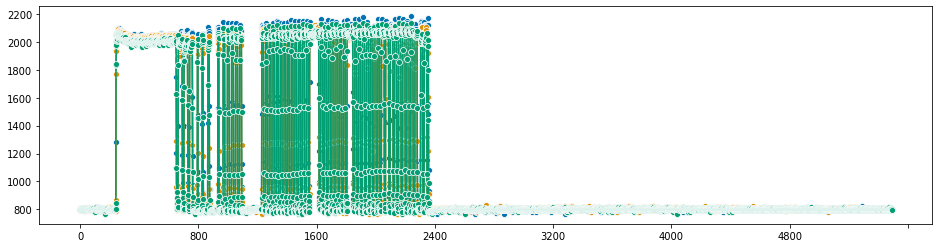

In [78]:
from sktime.utils.plotting import plot_series

plot_series(data['ED01_PRESS'][0], data['ED02_PRESS'][0], data['ED03_PRESS'][0])

In [79]:
import numpy as np
from sklearn.linear_model import RidgeClassifierCV
from sklearn.pipeline import make_pipeline

from sktime.transformations.panel.rocket import Rocket

In [100]:
rocket = Rocket()  # by default, ROCKET uses 10,000 kernels
print(type(data['ED01_PRESS'][0][0]))
rocket.fit(np.array([data['ED01_PRESS'][0][0], data['ED02_PRESS'][0][0]]))
X_train_transform = rocket.transform(np.array([data['ED03_PRESS'][0][0]]))
X_train_transform

<class 'pandas.core.series.Series'>


,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.854407,8.695938,0.934172,3.039225,0.08845,4.175842,0.787747,16.740495,0.196357,8.521231,...,0.832963,5.995022,0.724044,11.219886,0.061634,2.456291,0.959563,4.913729,0.194048,4.07593
